# K Nearest Neighbors - Projeto 

Bem-vindo ao Projeto de KNN! Este será um projeto simples e muito parecido com o notebook, com a diferença de que você receberá outro conjunto de dados. Vá em frente e siga as instruções abaixo.
## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obtenha os dados
** Leia o arquivo csv 'KNN_Project_Data' em um DataFrame **

In [3]:
df = pd.read_csv("KNN_Project_Data")

** Verifique o cabeçalho do DataFrame.**

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Análise exploratória de dados

Uma vez que esses dados são artificiais, vamos criar um grande pairplot com o Seaborn.

** Use seaborn no DataFrame para criar um pairplot com a tonalidade indicada pela coluna TARGET CLASS. **

In [14]:
df['TARGET CLASS'] = df['TARGET CLASS'].replace(0, "um")

In [15]:
df['TARGET CLASS']

0      zero
1        um
2        um
3      zero
4      zero
5        um
6      zero
7      zero
8      zero
9        um
10     zero
11       um
12       um
13     zero
14       um
15       um
16     zero
17     zero
18       um
19     zero
20     zero
21       um
22       um
23     zero
24       um
25       um
26     zero
27     zero
28     zero
29     zero
       ... 
970    zero
971    zero
972      um
973    zero
974      um
975    zero
976      um
977    zero
978    zero
979      um
980      um
981    zero
982    zero
983      um
984      um
985      um
986    zero
987      um
988    zero
989      um
990      um
991      um
992      um
993      um
994    zero
995    zero
996      um
997      um
998      um
999      um
Name: TARGET CLASS, Length: 1000, dtype: object

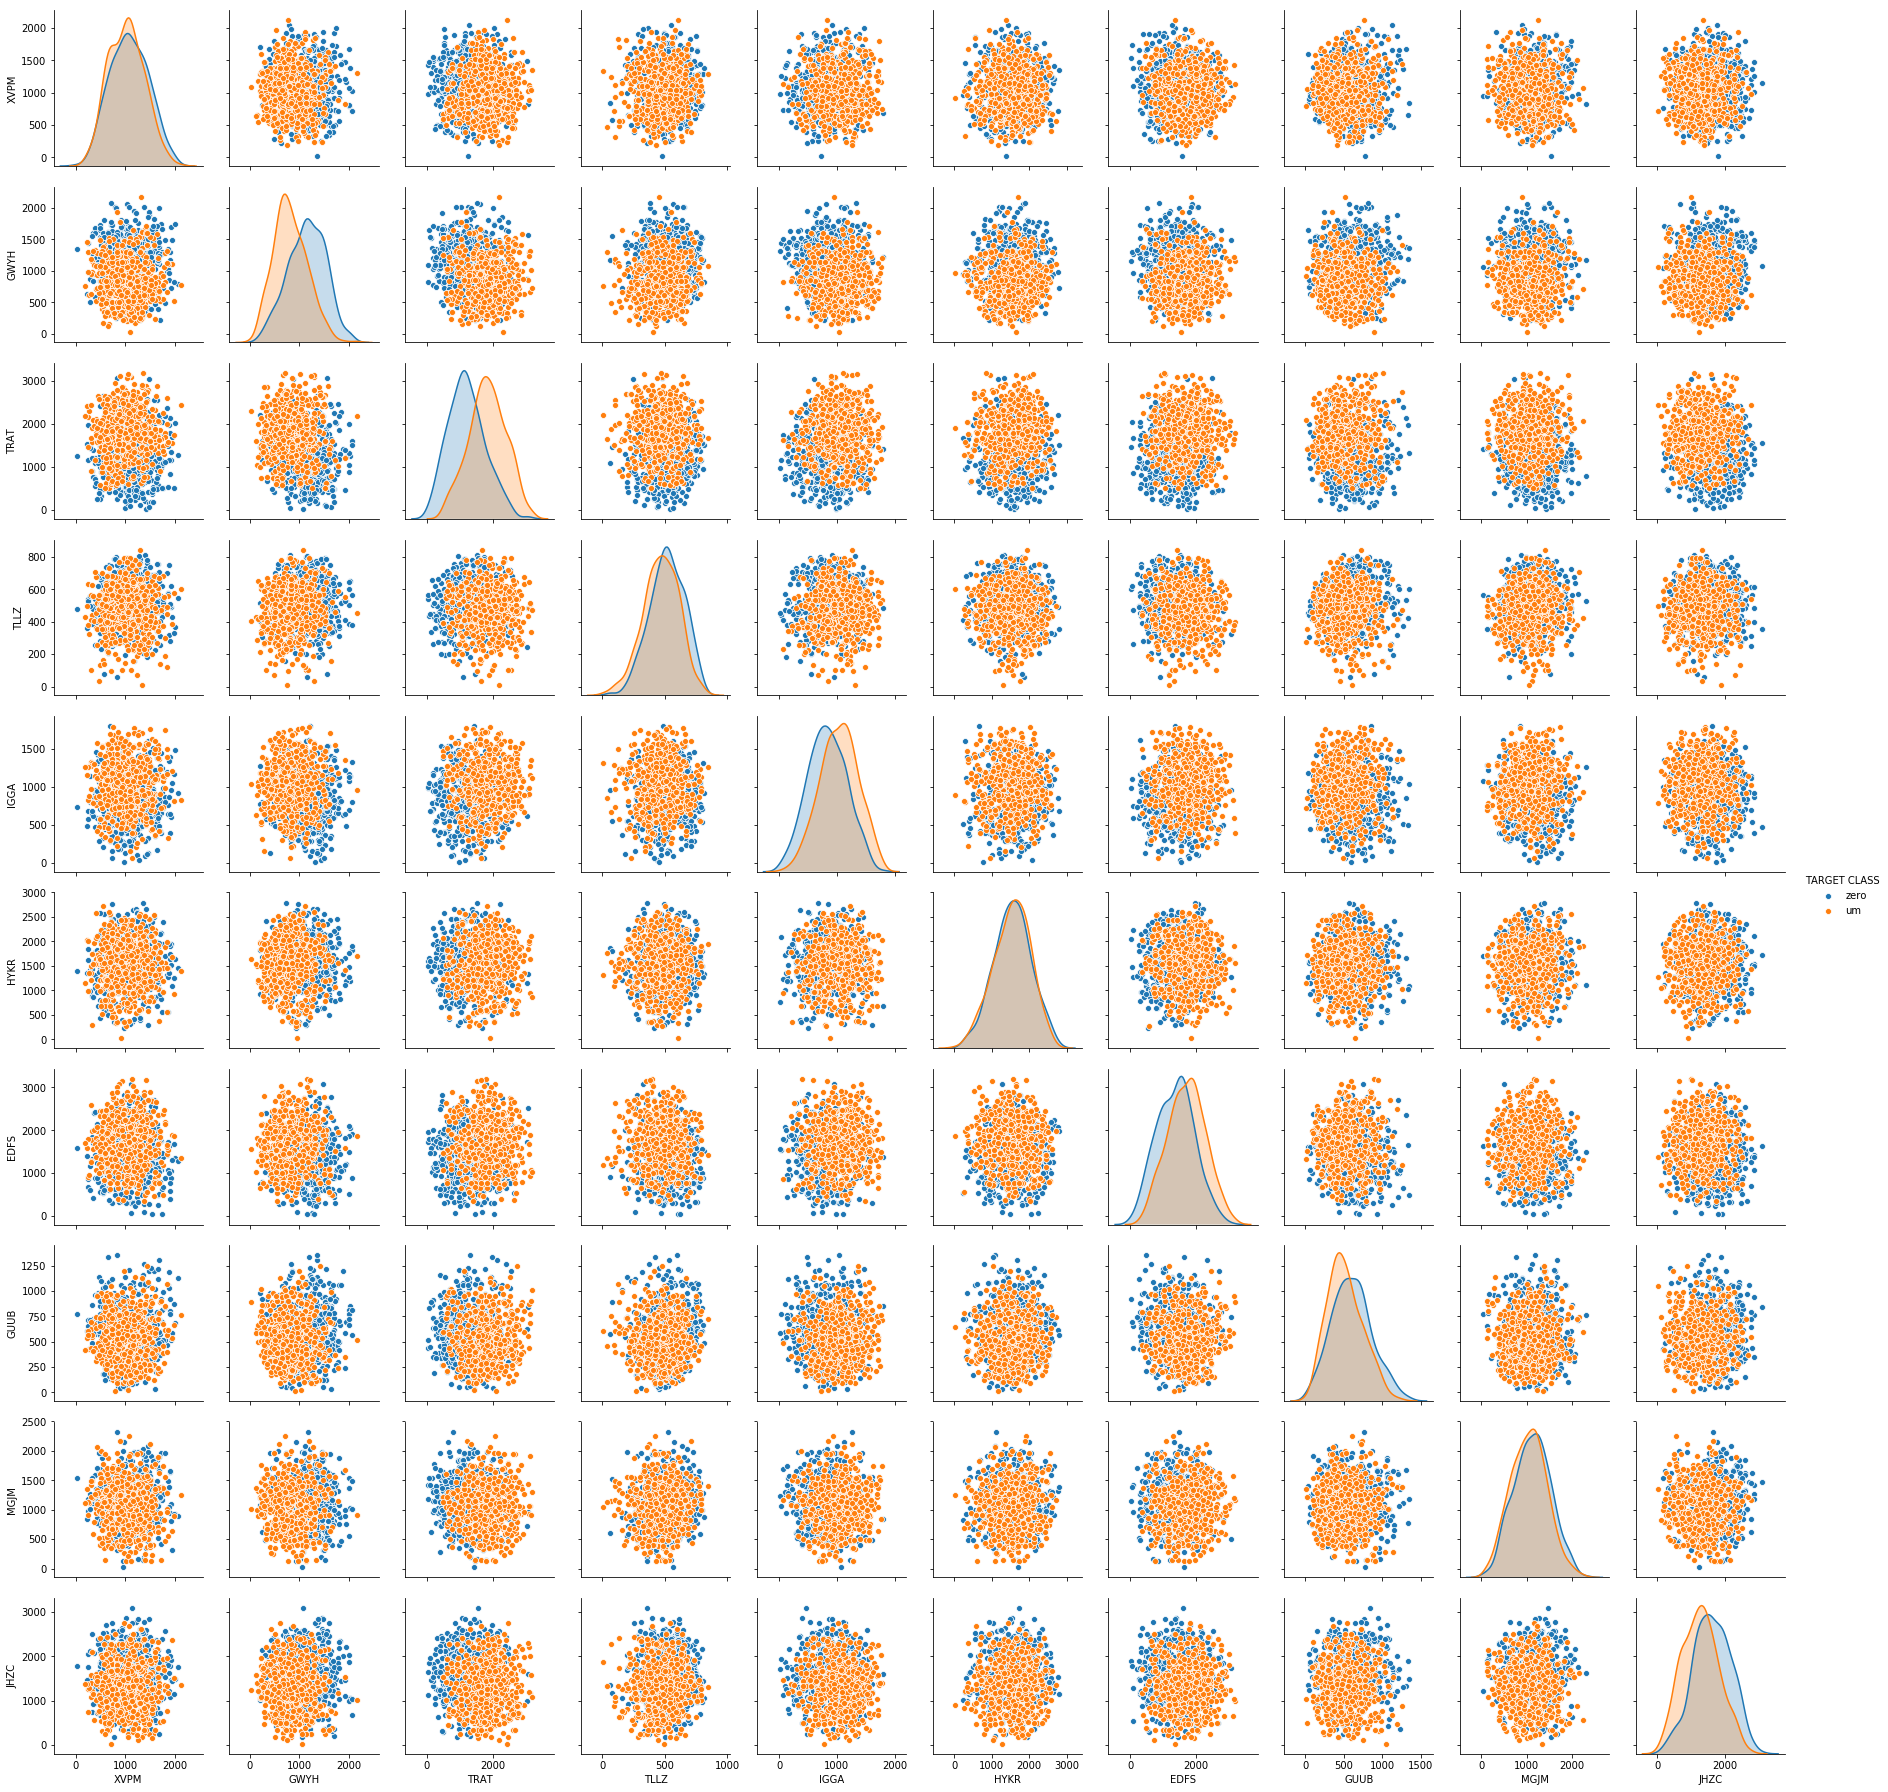

In [16]:
sns.pairplot(df, hue='TARGET CLASS')

# Padronize as variáveis

Hora de para padronizar as variáveis.

** Import StandardScaler do Scikit-learn. **

In [17]:
from sklearn.preprocessing import StandardScaler

** Crie um objeto StandardScaler() chamado scaler. **

In [18]:
scaler  = StandardScaler()

** Use o método fit() do objeto para treinar o modelo. **

In [20]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **

In [22]:
param_padronizados = scaler.transform(df.drop('TARGET CLASS', axis = 1))

** Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou. **

In [24]:
df_param = pd.DataFrame(param_padronizados, columns = df.columns[:-1])
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,zero
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,um
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,um
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,zero
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,zero


# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_param, df['TARGET CLASS'], test_size=0.3)

# Usando o KNN

** Importe o KNeighborClassifier do scikit learn. **

In [27]:
from sklearn.neighbors import KNeighborsClassifier

** Crie uma instância do modelo KNN com n_neighbors = 1 **

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

** Ajuste este modelo KNN aos dados de treinamento. **

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

** Use o método de previsão para prever valores usando seu modelo KNN e X_test. **

In [30]:
pred = knn.predict(X_test)

** Crie uma matriz de confusão e um relatório de classificação. **

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(y_test, pred))

[[121  38]
 [ 40 101]]


In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          um       0.75      0.76      0.76       159
        zero       0.73      0.72      0.72       141

   micro avg       0.74      0.74      0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



# Escolhendo o valor K
Vamos continuar usando o método do cotovelo para escolher um bom valor K!

** Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa. **

In [36]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))
error_rate

[0.26,
 0.2633333333333333,
 0.23666666666666666,
 0.24,
 0.21333333333333335,
 0.2,
 0.17666666666666667,
 0.18666666666666668,
 0.16333333333333333,
 0.18,
 0.18,
 0.18666666666666668,
 0.18333333333333332,
 0.17,
 0.16666666666666666,
 0.17333333333333334,
 0.17,
 0.16666666666666666,
 0.15666666666666668,
 0.15666666666666668,
 0.15666666666666668,
 0.16333333333333333,
 0.15666666666666668,
 0.16,
 0.16333333333333333,
 0.17,
 0.17333333333333334,
 0.17333333333333334,
 0.18,
 0.18,
 0.16666666666666666,
 0.17333333333333334,
 0.17,
 0.17,
 0.17333333333333334,
 0.17333333333333334,
 0.16666666666666666,
 0.17333333333333334,
 0.16666666666666666]

** Agora crie o seguinte gráfico usando as informações do seu loop. **

Text(0.5, 1.0, 'Taxa de erro vs Valor K')

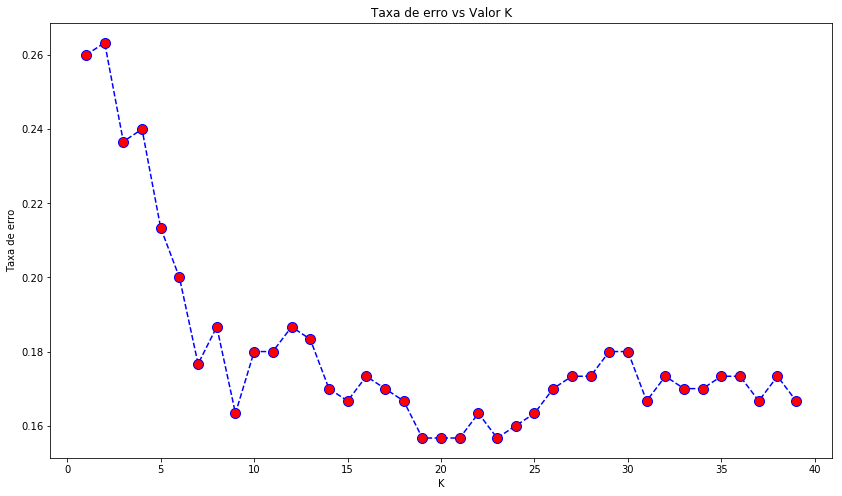

In [39]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markersize=10, markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Taxa de erro')
plt.title('Taxa de erro vs Valor K')

## Treine seu modelo novamente com novo valor K

** Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão. **

In [42]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')

[[137  22]
 [ 32 109]]


              precision    recall  f1-score   support

          um       0.81      0.86      0.84       159
        zero       0.83      0.77      0.80       141

   micro avg       0.82      0.82      0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



